### Librerias utilizadas + seed

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.io import arff

SEED = 21415

ModuleNotFoundError: No module named 'seaborn'

### Cargar el dataset

In [2]:
# Reemplazar con el PATH del dataset descargado
dataset_filepath = 'boston_housing.arff'

# Para cargar el dataset
data = arff.loadarff(dataset_filepath) 
df = pd.DataFrame(data[0])

### Separacion entre Test y Validation

In [3]:
# Reemplazar con la columna a predecir
pred_col_name = 'Fare'

# Separacion en Train, Validation ('X' e 'y' para cada split)
train_df, validation_df = train_test_split(df, test_size=0.2, random_state=SEED)
y_train, y_valid = train_df[pred_col_name], validation_df[pred_col_name]
X_train, X_valid = train_df.drop(pred_col_name, axis=1), validation_df.drop(pred_col_name, axis=1)

### Creacion de modelo de RF

In [4]:
rf_model = RandomForestRegressor(random_state=SEED)

### Entrenamiento

In [5]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21415)

### Predicción en validación

In [6]:
model_predictions = rf_model.predict(X_valid)


### Calcular métricas de accuracy

In [47]:
mse = mean_squared_error(y_valid, model_predictions)
print(f"Mean Squared Error of the model: {mse:.4f}")

Mean Squared Error of the model: 1133.6675


### Graficar ambos histogramas con la curva que mejor los fittea

c:\Users\Cecilia\anaconda3\envs\ml_data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Cecilia\anaconda3\envs\ml_data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


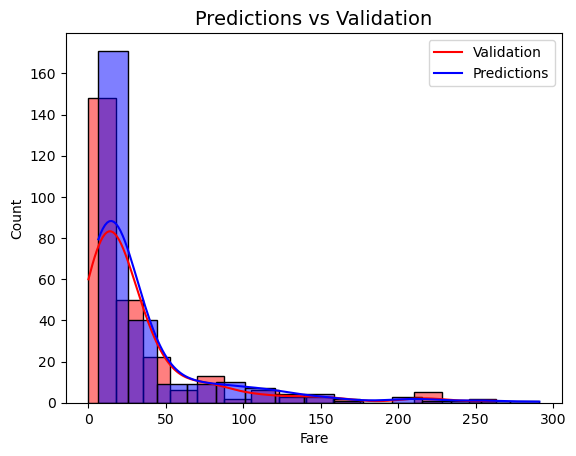

In [8]:
sns.histplot(data=y_valid, bins=15, kde=True, color='red', label='y_valid')
sns.histplot(data=model_predictions, bins=15, kde=True, color='blue', label='model_predictions')

plt.title('Predictions vs Validation', fontsize=14)
plt.legend(['Validation', 'Predictions'])
plt.show()

### Grafico para comparar modelos en accuracy

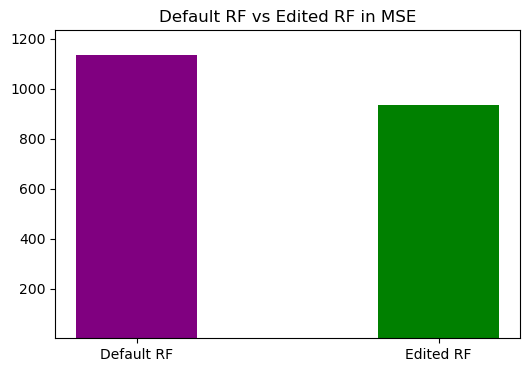

In [44]:
default_rf_avg_distance = mse
edited_rf_avg_distance = mse - 200

plt.figure(figsize=(6, 4))
plt.bar(x=["Default RF", "Edited RF"], height=[default_rf_avg_distance, edited_rf_avg_distance], 
        color=['purple', 'green'], width=0.4)
plt.ylim(1, max(default_rf_avg_distance, edited_rf_avg_distance) + 100)
plt.title("Default RF vs Edited RF in MSE")

plt.show()
